Import all necessary functions and classes from FastAI's library.
Import Image classes from the Python Imaging Library (PIL) for handling image.
Import NumPy, a library for numerical operations, to handle arrays and perform mathematical computations

In [10]:
from fastai.imports import *
from fastai.vision.all import *
from fastai.vision.widgets import *
from PIL import Image
import numpy

**First time you run the code, you need to run this line. However, if you run it again, you should comment it out. Otherwise, some weird problems may occur.**

In [5]:
#!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 62.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 6.3 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4711 sha256=31302294e25882facc71fee125306af9e2ef9d75bb09fae37c441a8233127c6e
  Stored in directory: /root/.cache/pip/wheels/c0/96/80/1aeaaf27265398a7393b296714b84e51a7d00101f8a665a25a
Successfully built ffmpy


**Import Gradio, a library for creating web-based user interfaces for machine learning models**

In [8]:
import gradio as gr

**Load a previously trained model from a .pkl (pickle) file**

In [ ]:
learn= load_learner('/kaggle/input/firstmodel/firstModel.pkl')

**Define a function that takes an input image, uses the loaded model to make a prediction,and returns the prediction along with its probability**

In [ ]:
labels = learn.dls.vocab
def predict(img):
    img = numpy.asarray(img)
    #print((img))
    pred,pred_idx,probs = learn.predict(img)
    #print(pred)
    #print(float(probs[pred_idx]))
    return {str(pred): float(probs[pred_idx])}

**Load a image from the validation set**

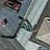

In [23]:
PATH = "/kaggle/input/testset/data/validation"
im = Image.open(PATH+"/no_pools/img922.jpg")
im


**Predict if the image contains a pool or not.**

In [24]:
learn.predict(im)

('no_pools', tensor(0), tensor([9.9918e-01, 8.1996e-04]))

**Create and launch a Gradio interface using the predict function, with an image input of shape (50, 50),and returning the top 1 class labels as output; the interface is shareable via a public link**

In [26]:
gr.Interface(fn=predict, inputs=gr.inputs.Image(shape=(50, 50)), outputs=gr.outputs.Label(num_top_classes=1)).launch(share=True)

/opt/conda/lib/python3.7/site-packages/gradio/inputs.py:258: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/opt/conda/lib/python3.7/site-packages/gradio/outputs.py:198: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://227a8a713c1bb138fd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


no_pools
0.9997954964637756


pools
0.6372541189193726


no_pools
0.9999998807907104


pools
0.9999634027481079
